In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('diabetes.csv')
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [5]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [8]:
def knn_func(train_x, train_label, test_x, k):
    """
    train_x - train features
    train_label - train targets
    test_x - validation data(features)
    k - nearest neighbours <int>
    """
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_x, train_label)
    prediction = knn.predict(test_x)
    return prediction

In [9]:
import math
n = data.shape[0]
k_max = math.sqrt(n)
k_max

27.712812921102035

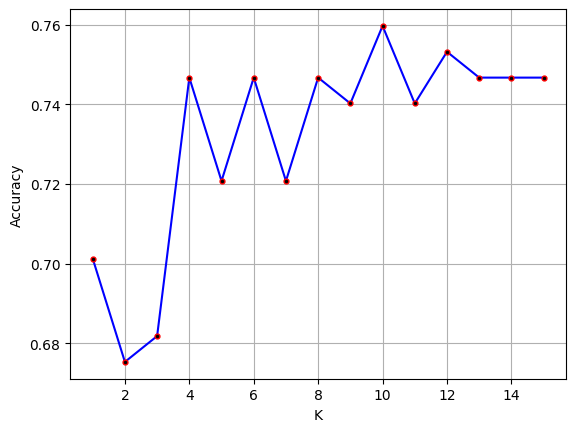

In [14]:
normal_accuracy = []
k_values = range(1,16)

for k in k_values :
    y_pred = knn_func(X_train,y_train,X_test,k)
    accur = accuracy_score(y_test,y_pred)
    normal_accuracy.append(accur)

plt.plot(k_values,normal_accuracy,c="blue",marker=".",ms=7,mfc="black",mec="red")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()